# COURSE: Master statistics and machine learning: intuition, math, code

## SECTION: Visualizing data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Video:  Bar plots

In [2]:
## create data for the bar plot

# data sizes
m = 30 # rows
n =  6 # columns

# generate data
data = np.zeros((m, n))

for i in range(n):
    data[:,i] = 30*np.random.randn(m) * (2*i/(n-1)-1)**2 + (i+1)**2

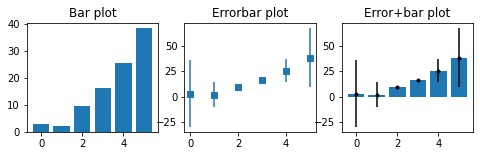

In [3]:
# show the bars!

fig,ax = plt.subplots(1,3,figsize=(8,2))

# 'naked' bars
ax[0].bar(range(n),np.mean(data,axis=0))
ax[0].set_title('Bar plot')

# just the error bars
ax[1].errorbar(range(n),np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='s',linestyle='')
ax[1].set_title('Errorbar plot')

# both
ax[2].bar(range(n),np.mean(data,axis=0))
ax[2].errorbar(range(n),np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='.',linestyle='',color='k')
ax[2].set_title('Error+bar plot')

plt.show()

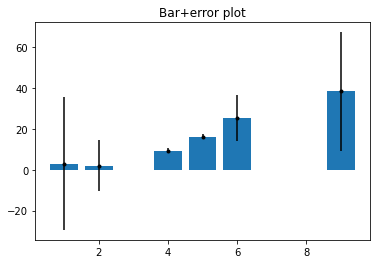

In [4]:
## manually specify x-axis coordinates

xcrossings = [ 1, 2, 4, 5, 6, 9 ]

plt.bar(xcrossings,np.mean(data,axis=0))
plt.errorbar(xcrossings,np.mean(data,axis=0),np.std(data,axis=0,ddof=1),marker='.',linestyle='',color='k')
plt.title('Bar+error plot')

plt.show()

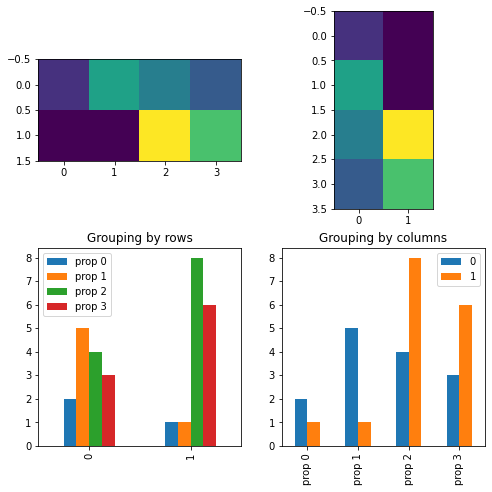

In [5]:
## note about bars from matrices

# data are groups (rows) X property (columns)
m = [ [2,5,4,3], [1,1,8,6] ]

fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(8,8))

# conceptualizing the data as <row> groups of <columns>
ax[0,0].imshow(m)

# using pandas dataframe
df = pd.DataFrame(m,columns=['prop 0','prop 1','prop 2','prop 3'])
df.plot(ax=ax[1,0],kind='bar')
ax[1,0].set_title('Grouping by rows')


# now other orientation (property X group)
ax[0,1].imshow(np.array(m).T)
df.T.plot(ax=ax[1,1],kind='bar')
ax[1,1].set_title('Grouping by columns')

plt.show()

### Video: Box-and-whisker plots

In [6]:
## create data for the bar plot

# data sizes
m = 30 # rows
n =  6 # columns

# generate data
data = np.zeros((m,n))

for i in range(n):
    data[:,i] = 30*np.random.randn(m) * (2*i/(n-1)-1)**2 + (i+1)**2

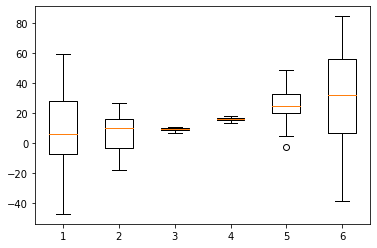

In [7]:
# now for the boxplot

plt.boxplot(data)
plt.show()

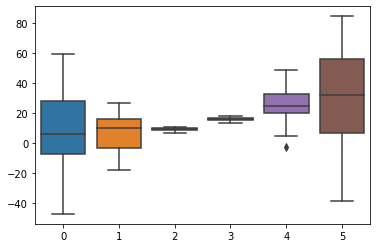

In [8]:
# now with seaborn
sns.boxplot(data=data,orient='v')
plt.show()

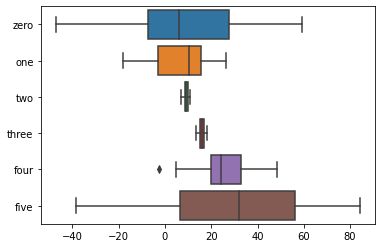

In [9]:
# or as a pandas data frame
df = pd.DataFrame(data,columns=['zero','one','two','three','four','five'])
sns.boxplot(data=df,orient='h')
plt.show()

### Video: Histograms

In [10]:
## create data for the histogram

# number of data points
n = 1000

# generate data - log-normal distribution
data = np.exp( np.random.randn(n)/2 )

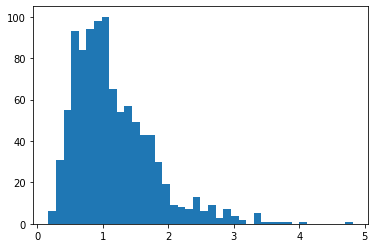

In [11]:
# show as a histogram

# number of histogram bins
k = 40

plt.hist(data,bins=k)
plt.show()

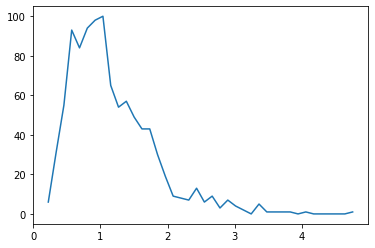

In [12]:
# another option
y,x = np.histogram(data,bins=k)

# bin centers
xx = (x[1:]+x[:-1])/2

plt.plot(xx,y)
plt.show()

### Video: Pie Charts

In [13]:
## create data for the plot

nbins = 5
totalN = 100

rawdata = np.ceil(np.logspace(np.log10(1/2),np.log10(nbins-.01),totalN))


# prepare data for pie chart
uniquenums = np.unique(rawdata)
data4pie = np.zeros(len(uniquenums))

for i in range(len(uniquenums)):
    data4pie[i] = sum(rawdata==uniquenums[i])


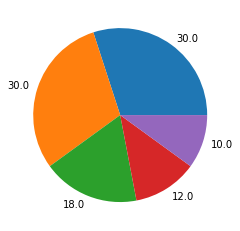

In [14]:
# show the pie chart
plt.pie(data4pie,labels=100*data4pie/sum(data4pie))
plt.show()

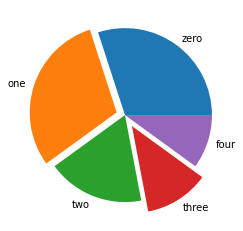

In [15]:
# another option
plt.pie(data4pie,labels=['zero','one','two','three','four'],explode=[0,.1,0,.15,0])
plt.show()

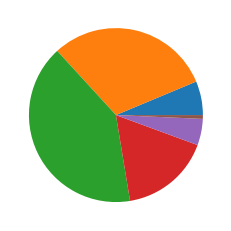

In [16]:
## for continuous data

# generate log-normal distribution
data = np.exp( np.random.randn(1000)/10 )


# generate bins using histogram
histout = np.histogram(data,bins=6)

# and show that as a pie chart
plt.pie(histout[0])
plt.show()

### Video: Line Plots

In [17]:
## create data for the plot

# number of data points
n = 1000

# generate log-normal distribution
data1 = np.exp( np.random.randn(n)/2 )
data2 = np.exp( np.random.randn(n)/10 )
data3 = np.exp( np.random.randn(n)/2 + 1 )


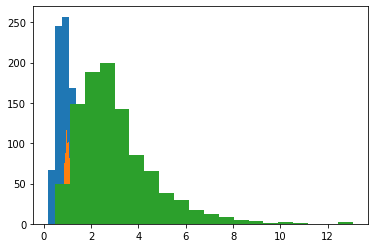

In [18]:
## plots of their histograms

# number of histogram bins
k = 20

plt.hist(data1,bins=k)
plt.hist(data2,bins=k)
plt.hist(data3,bins=k)

plt.show()

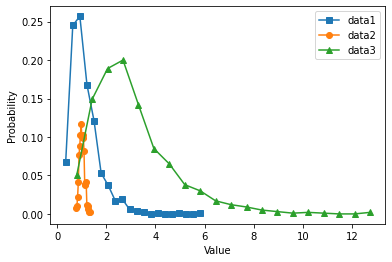

In [19]:
# histogram discretization for the datasets
y1,x1 = np.histogram(data1,bins=k)
xx1 = (x1[0:-1] + x1[1:]) / 2
y1 = y1 / sum(y1) # convert to probability

y2,x2 = np.histogram(data2,bins=k)
xx2 = (x2[0:-1] + x2[1:]) / 2
y2 = y2 / sum(y2) # convert to probability

y3,x3 = np.histogram(data3,bins=k)
xx3 = (x3[0:-1] + x3[1:]) / 2
y3 = y3 / sum(y3) # convert to probability



# show the plots
plt.plot(xx1,y1,'s-',label='data1')
plt.plot(xx2,y2,'o-',label='data2')
plt.plot(xx3,y3,'^-',label='data3')

plt.legend()
plt.xlabel('Value')
plt.ylabel('Probability')
plt.show()